In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\MEET\Desktop\programs\Data Analyst Projects\Shop\Online Sales Data.csv', encoding='unicode_escape')

In [3]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

# Product Category

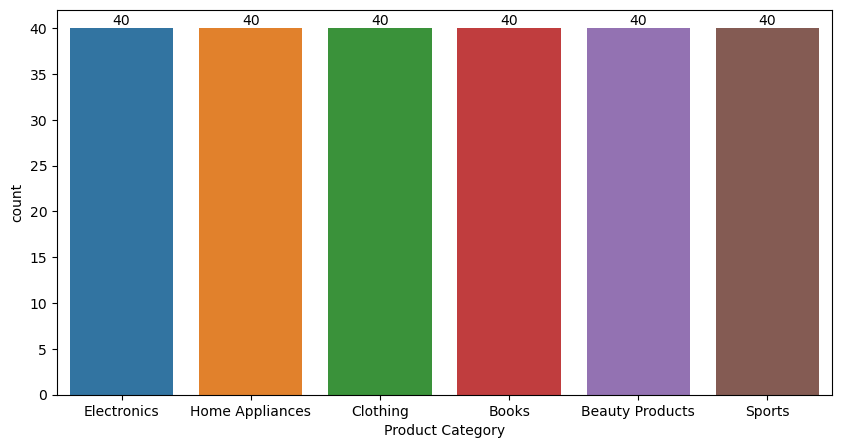

In [7]:
plt.figure(figsize=(10,5))  # Specify the width and height in inches
ax= sns.countplot(x='Product Category' ,data= df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product Category', ylabel='Total Revenue'>

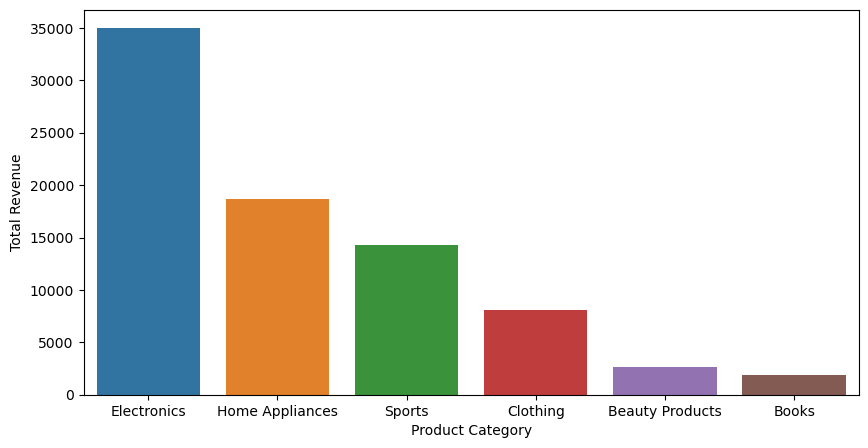

In [8]:
plt.figure(figsize=(10,5))
ab=df.groupby(['Product Category'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
sns.barplot(x='Product Category',y='Total Revenue',data=ab)

 # Region

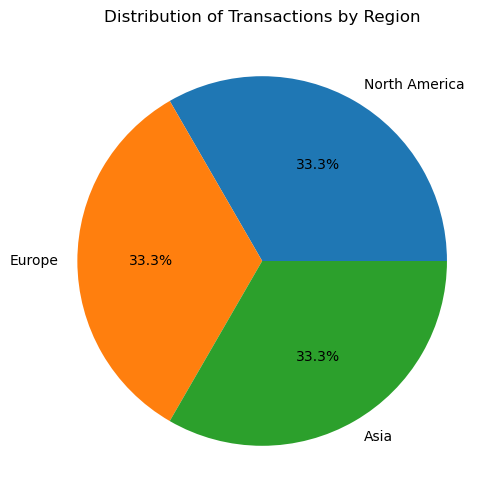

In [9]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transactions by Region')
plt.show()

<Axes: xlabel='Region', ylabel='Total Revenue'>

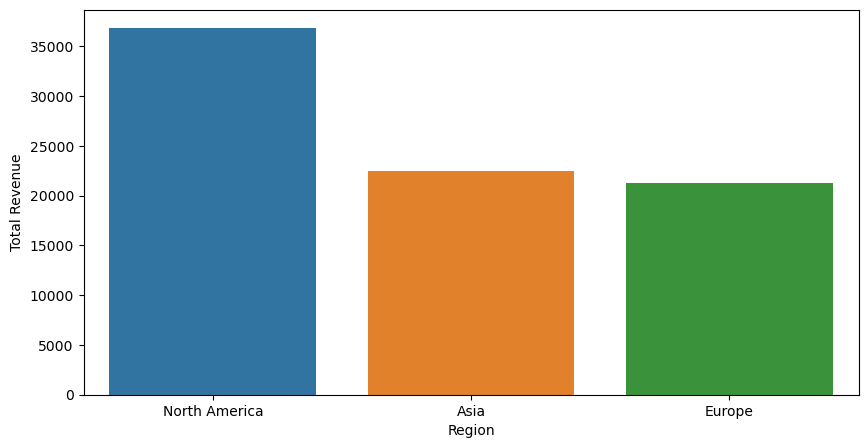

In [10]:
plt.figure(figsize=(10,5))
ab=df.groupby(['Region'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
sns.barplot(x='Region',y='Total Revenue',data=ab)

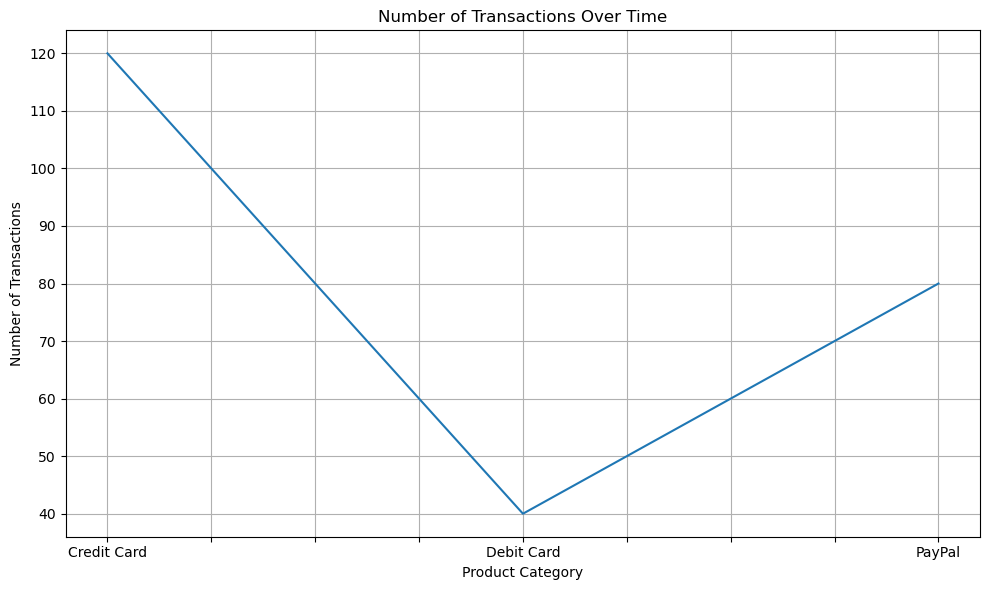

In [16]:
transactions_by_date = df.groupby('Payment Method').size()

# Create a line chart
plt.figure(figsize=(10, 6))
transactions_by_date.plot()
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

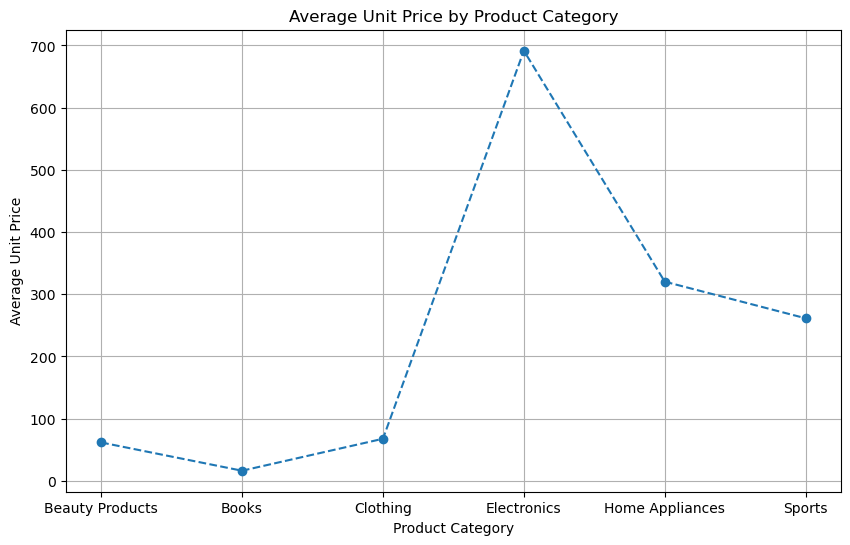

In [12]:
avg_unit_price_by_category = df.groupby('Product Category')['Unit Price'].mean()

plt.figure(figsize=(10, 6))
avg_unit_price_by_category.plot(marker='o', linestyle='--')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Product Category')
plt.grid(True)
plt.show()

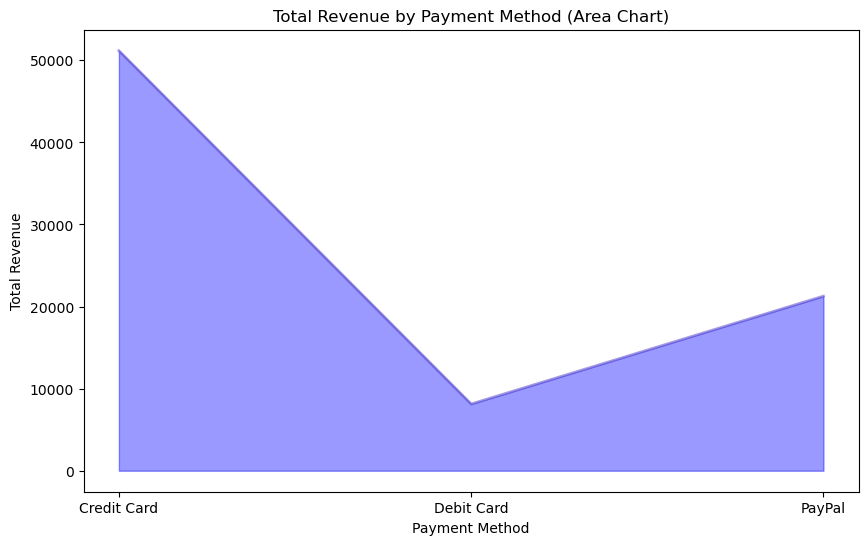

In [13]:
total_revenue_by_payment_method = df.groupby('Payment Method')['Total Revenue'].sum()

# Create an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(total_revenue_by_payment_method.index, total_revenue_by_payment_method, color='blue', alpha=0.4)
plt.plot(total_revenue_by_payment_method.index, total_revenue_by_payment_method, color='Slateblue', alpha=0.6, linewidth=2)
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Payment Method (Area Chart)')
plt.show()